In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import and explore the data

In [2]:
ad=pd.read_csv('advertising.csv')
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


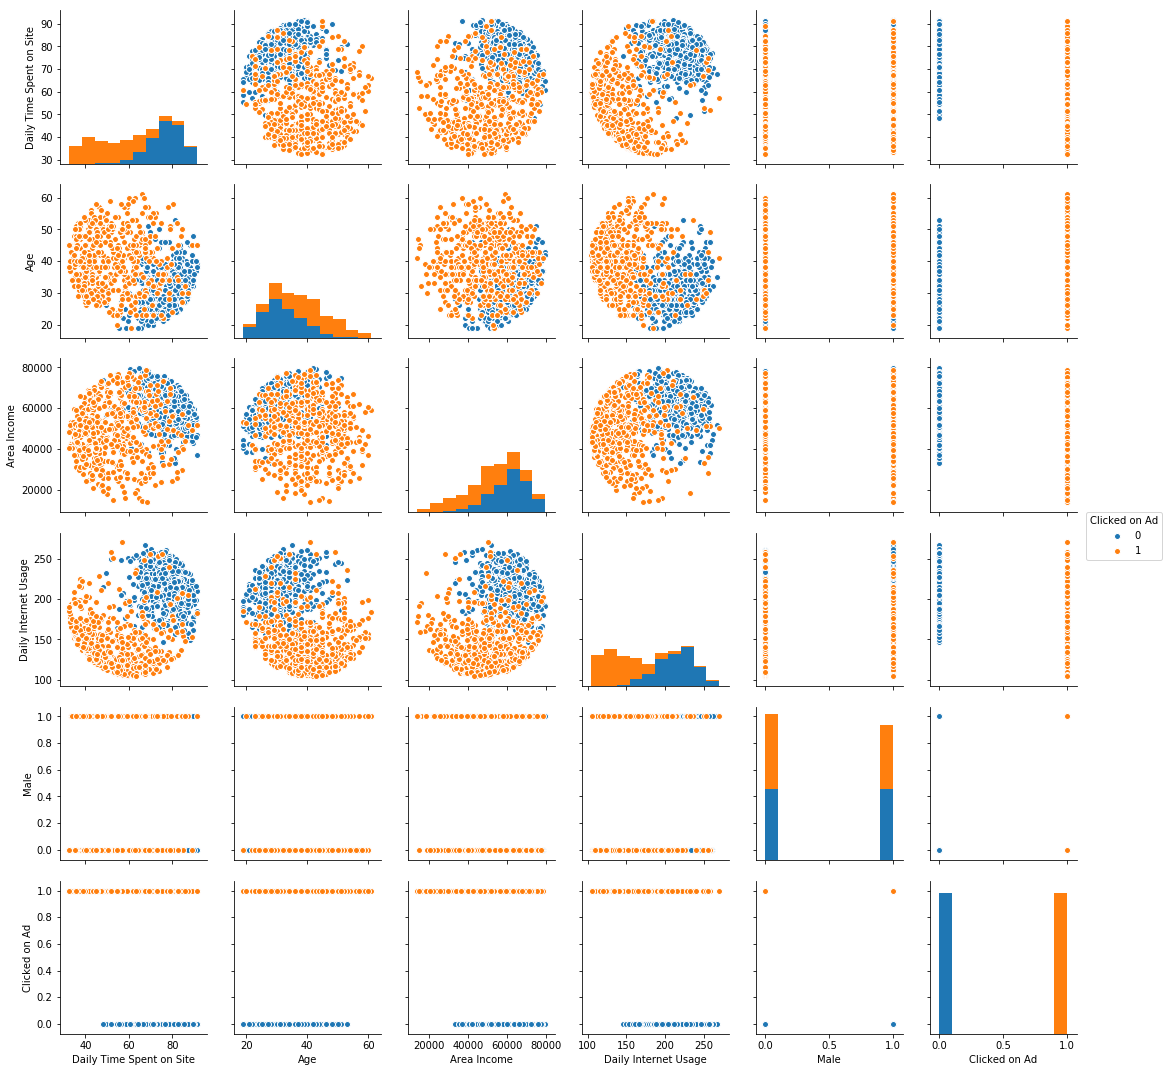

In [42]:
sb.pairplot(ad, hue='Clicked on Ad')
# hue = shows clicked on ad data in different color here

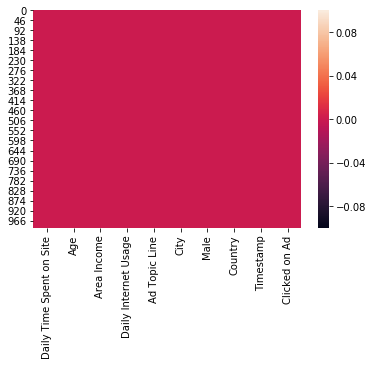

In [43]:
sns.heatmap(ad.isnull())

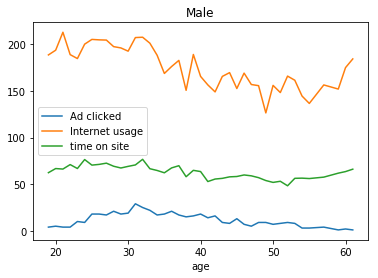

In [76]:
plt.plot(ad[ad['Male']==1].groupby('Age')['Clicked on Ad'].count(),label='Ad clicked')
plt.plot(ad[ad['Male']==1].groupby('Age')['Daily Internet Usage'].mean(),label='Internet usage')
plt.plot(ad[ad['Male']==1].groupby('Age')['Daily Time Spent on Site'].mean(),label='time on site')

plt.title('Male')
plt.xlabel('age')
plt.legend()

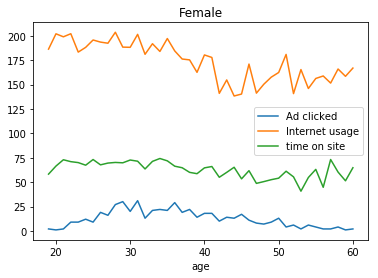

In [77]:
plt.plot(ad[ad['Male']==0].groupby('Age')['Clicked on Ad'].count(),label='Ad clicked')
plt.plot(ad[ad['Male']==0].groupby('Age')['Daily Internet Usage'].mean(),label='Internet usage')
plt.plot(ad[ad['Male']==0].groupby('Age')['Daily Time Spent on Site'].mean(),label='time on site')

plt.title('Female')
plt.xlabel('age')
plt.legend()

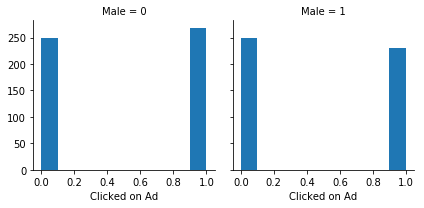

In [131]:
fg=sns.FacetGrid(ad,col='Male')
fg.map(plt.hist,'Clicked on Ad')
# female are more likely to click on an ad

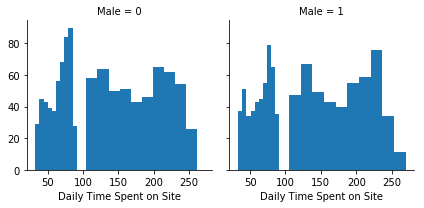

In [137]:
fg=sns.FacetGrid(ad,col='Male')
print (fg.map(plt.hist,'Daily Internet Usage'))


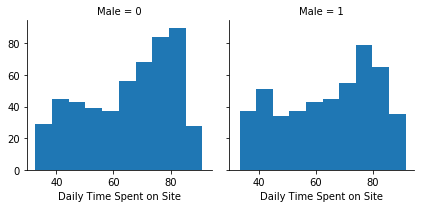

In [138]:
fg=sns.FacetGrid(ad,col='Male')
print (fg.map(plt.hist,'Daily Time Spent on Site'))

# Train the data

In [81]:
x=ad[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Male']]
y=ad['Clicked on Ad']

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(  x, y, test_size=0.2, random_state=101)

In [83]:
from sklearn.linear_model import LogisticRegression
lorm=LogisticRegression()
lorm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
predictions=lorm.predict(x_test)


# Evaluation

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.90      0.94      0.92       105
          1       0.93      0.88      0.91        95

avg / total       0.92      0.92      0.91       200

[[99  6]
 [11 84]]


In [ ]:
# not so bad with 92%

# Test the model with new data

In [90]:
x.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.9,256.09,0


In [ ]:
# data from person A
# 77.9, 32, 56000, 222, 1

In [91]:
New_pred=lorm.predict(np.array([[77.9, 32, 5600, 222, 1]]))

In [94]:
if New_pred == 1:
    print('person A will click on the ad')
else:
    print ('Person A will not click on the ad')

Person A will not click on the ad


# scale the data and test the model again

In [ ]:
# why scale the data?
# unscaled features, large scale data has more influence on the weight.

# how scale the feature help improve accuracy in classification?
#feature scaling makes the assumption that all the features has the equality opportunity to 
# influence the weight, which more really reflects the information/knowledge we know about the data.


In [117]:
# lets scale the data
from sklearn.preprocessing import StandardScaler

In [164]:
scaler=StandardScaler()

In [119]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [120]:
x_train

array([[-0.42369319, -0.55759948, -1.96617077, -1.15328581, -0.96559161],
       [-1.44724322, -0.89528273,  0.46999568,  0.52566438,  1.03563452],
       [ 0.82340518, -1.1204049 ,  0.69655644,  0.51091451, -0.96559161],
       ..., 
       [ 0.66202336, -0.89528273,  0.38492263,  1.24979088,  1.03563452],
       [ 0.1986001 ,  0.79313355,  1.01329762, -1.18025042, -0.96559161],
       [ 0.74491208,  0.34288921,  0.84745042,  1.4318596 ,  1.03563452]])

In [121]:
lorm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
predictions=lorm.predict(x_test)


In [123]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       105
          1       0.98      0.96      0.97        95

avg / total       0.97      0.97      0.97       200

[[103   2]
 [  4  91]]


In [124]:
# wow. 5% higher

In [125]:
# also need to transform the new data to fit into the model
New_pred=lorm.predict(scaler.transform(np.array([[77.9, 32, 5600, 222, 1]])))

In [127]:
if New_pred == 1:
    print('person A will click on the ad')
else:
    print ('Person A will not click on the ad')

Person A will not click on the ad


In [ ]:
# still will not click

# The StandardScaler assumes your data is normally distributed within each feature

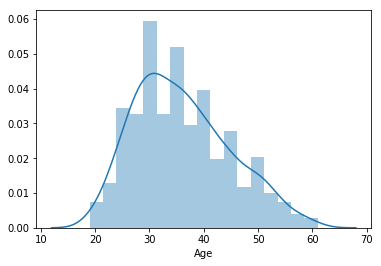

In [159]:
sns.distplot(x['Age'])

In [163]:
testing = x['Age'].values
testing.shape # simply a list

(1000,)

In [167]:
testing = testing.reshape(-1,1) # need to convert it to 2d to use fit transform
testing.shape

(1000, 1)

In [168]:
testing=scaler.fit_transform(testing)

/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


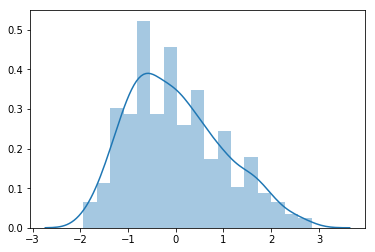

In [169]:
sns.distplot(testing) 